In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [4]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [15]:
data_train_path = r"D:\Mayur_Project\Dataset\Training"
data_test_path  = r"D:\Mayur_Project\Dataset\Testing"

In [16]:
img_width = 180
img_height = 180

In [17]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                        shuffle=True,
                                                        image_size=(img_width,img_height),
                                                        batch_size=32,
                                                        validation_split=False) 

Found 5712 files belonging to 4 classes.


In [18]:
data_cat = data_train.class_names
data_cat

['glioma', 'meningioma', 'notumor', 'pituitary']

In [19]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                        shuffle=True,
                                                        image_size=(img_width,img_height),
                                                        batch_size=32,
                                                        validation_split=False) 

Found 1311 files belonging to 4 classes.


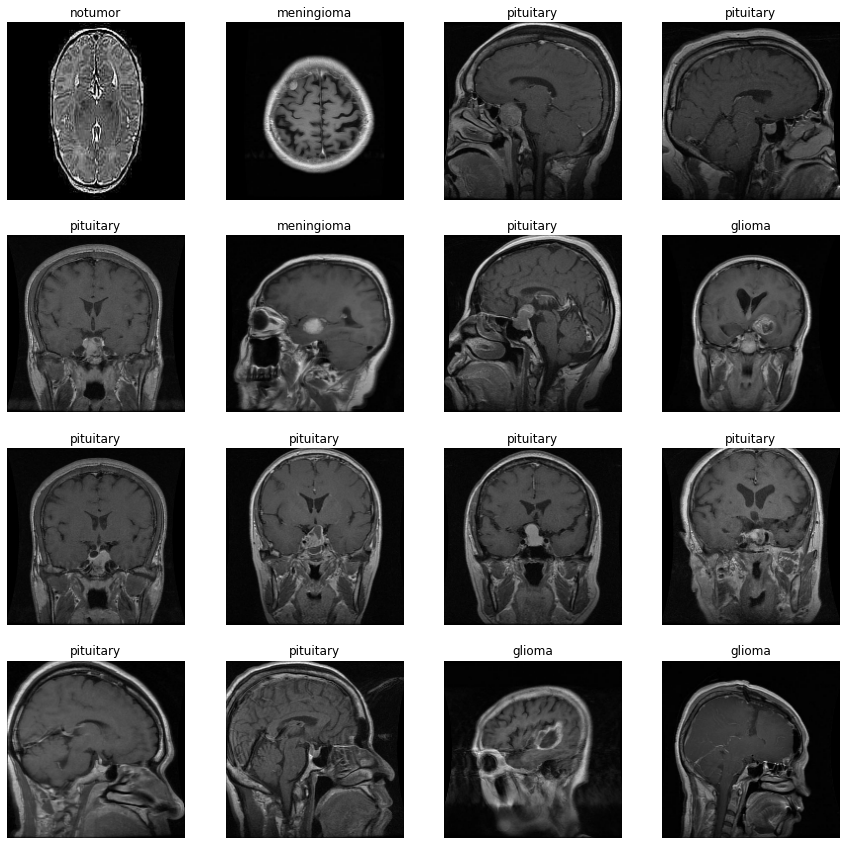

In [14]:
plt.figure(figsize=(15,15))
for image, lables in data_train.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[lables[i]])
        plt.axis("off")

In [15]:
from tensorflow.keras.models import Sequential


In [16]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3 ,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding= 'same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(.20),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [20]:
epochs_size =  25
history = model.fit(data_train,validation_data=data_test,epochs=epochs_size)

Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.6393 - loss: 0.9375 - val_accuracy: 0.8291 - val_loss: 0.4567
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 137ms/step - accuracy: 0.8686 - loss: 0.3568 - val_accuracy: 0.8810 - val_loss: 0.3204
Epoch 3/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 144ms/step - accuracy: 0.9267 - loss: 0.2111 - val_accuracy: 0.9283 - val_loss: 0.2076
Epoch 4/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.9487 - loss: 0.1386 - val_accuracy: 0.9443 - val_loss: 0.1613
Epoch 5/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.9664 - loss: 0.0984 - val_accuracy: 0.9519 - val_loss: 0.1448
Epoch 6/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.9828 - loss: 0.0532 - val_accuracy: 0.9558 - val_loss: 0.1923
Epoch 7/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 157ms/step - accuracy: 0.9858 - loss: 0.0430 - val_accuracy: 0.9382 - val_loss: 0.2104
Epoch 8/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.9934 - loss: 0

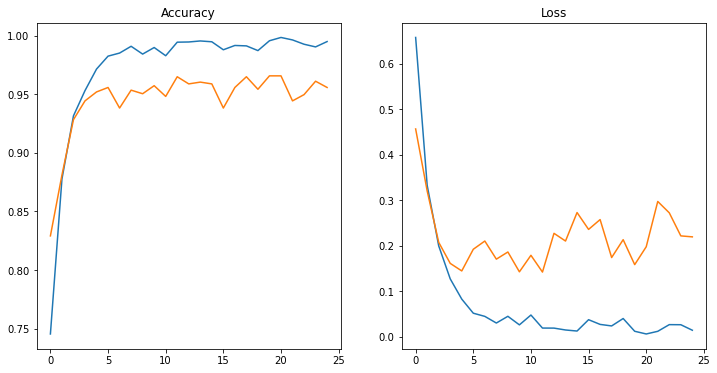

In [21]:
epochs_range = range(epochs_size)
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label= "Training Accuracy")
plt.plot(epochs_range,history.history['val_accuracy'],label= "Validation Accuracy")
plt.title("Accuracy")


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label= "Training Loss")
plt.plot(epochs_range,history.history['val_loss'],label= "Validation Loss")
plt.title("Loss");
